Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Pre-procesamiento de los datos de trayectorias de Albatros

Presenta: Ana Maritza Bello

---

## Limpieza de datos

Los datos de las trayectorias de albatros fueron obtenidos con GPS, por lo que
no contienen valores nulos.

## Transformación de datos

Con el fin de lograr una representación de ubicaciones en la superficie de la
tierra, se unifican los campos de latitud y longitud en un campo de tipo
_geometry_. Para ello, se utiliza la librería _geopandas_. Además, se convierte
el campo de fecha a un campo de tipo _datetime_.

In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/trajectories.csv')
geo_df = gpd.GeoDataFrame(df, geometry=df['geom'].apply(wkt.loads))
geo_df.head()

,id,geom,date,latitude,longitude,name,season,spheroid_dist_to_colony,sst,geometry
0,1,POINT(-118.327013 29.110365),2014-01-19,29.110365,-118.32701,LAAL01,incubacion,0.0,17.581,POINT (-118.32701 29.11037)
1,2,POINT(-118.327008 29.110315),2014-01-19,29.110315,-118.32701,LAAL01,incubacion,0.0,17.581,POINT (-118.32701 29.11031)
2,3,POINT(-118.327022 29.11034),2014-01-19,29.110340,-118.32702,LAAL01,incubacion,0.0,17.581,POINT (-118.32702 29.11034)
3,4,POINT(-118.327045 29.110412),2014-01-19,29.110413,-118.32704,LAAL01,incubacion,0.0,17.581,POINT (-118.32704 29.11041)
4,5,POINT(-118.326942 29.110427),2014-01-19,29.110428,-118.32694,LAAL01,incubacion,0.0,17.581,POINT (-118.32694 29.11043)


(23.0, 55.0)

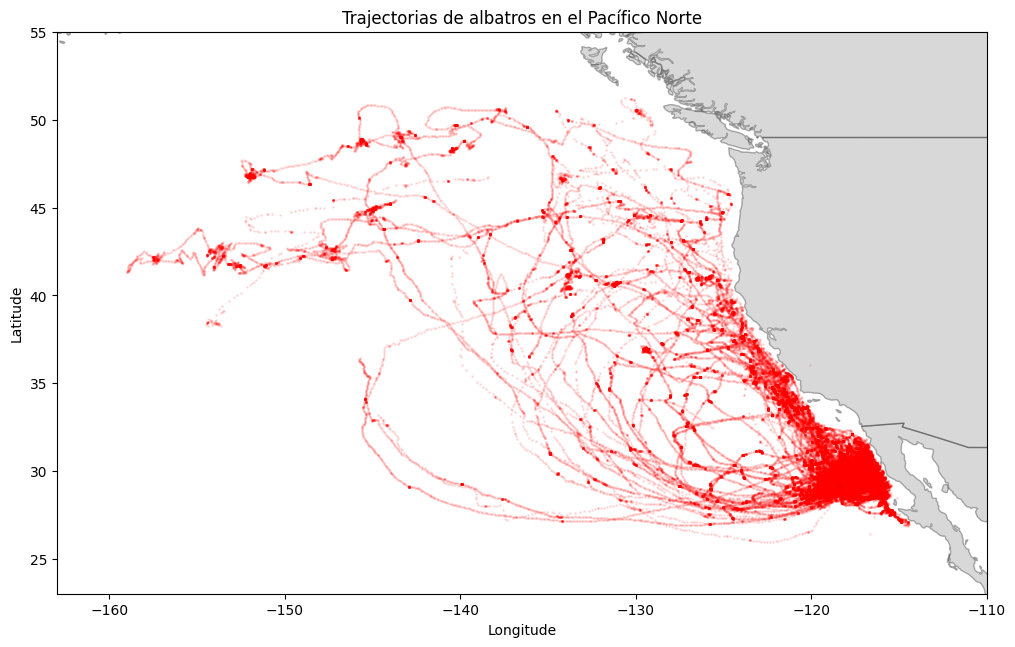

In [7]:
# Mapa de la zona de estudio
import matplotlib.pyplot as plt

shapefile_name = '../data/americas_shapefile.csv'
# Load shapefile from csv
shp_df = pd.read_csv(shapefile_name)

shapefile = gpd.GeoDataFrame(shp_df, geometry=shp_df['geom'].apply(wkt.loads))

base = shapefile.plot(figsize=(12, 8), alpha=0.3, edgecolor='k', color='gray')
geo_df.plot(ax=base, alpha=0.1, marker='o', markersize=1, color='red')

# Ejes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Título
plt.title('Trajectorias de albatros en el Pacífico Norte')

# Zoom in to see the trajectories

min_lat = 23
max_lat = 55
min_lon = -163
max_lon = -110

plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

In [4]:
# Buscar duplicados en el campo geom

duplicated_geometries = geo_df['geom'].value_counts(dropna=False).loc[lambda x : x>1]
duplicated_geometries

geom
POINT(-118.291496 28.88382)     9
POINT(-118.291447 28.883798)    9
POINT(-118.291452 28.88382)     8
POINT(-118.292099 28.884642)    8
POINT(-118.291447 28.883818)    8
                               ..
POINT(-118.291473 28.883804)    2
POINT(-118.291321 28.884466)    2
POINT(-118.291462 28.884023)    2
POINT(-118.29213 28.884668)     2
POINT(-118.291752 28.884613)    2
Name: count, Length: 6677, dtype: int64

Text(0.5, 1.0, 'Número de geometrías repetidas y su frecuencia')

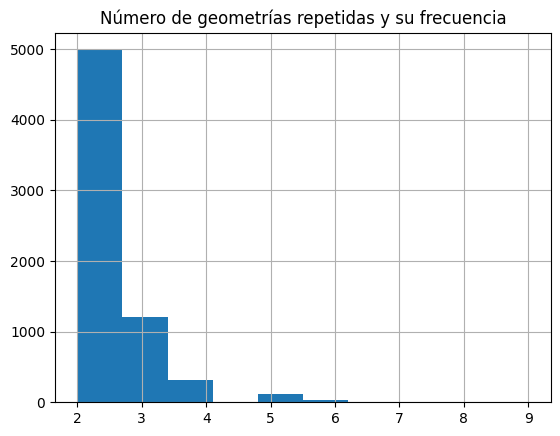

In [5]:
duplicated_geometries.hist(bins=10)
duplicated_geometries.value_counts() # 4982 geometrías que se repiten 2 veces

# Titulo
plt.title('Número de geometrías repetidas y su frecuencia')

# Identificación de valores repetidos

Se identificaron los valores de puntos repetidos en las trayectorias de los
albatros. Sin embargo, aunque se identificaron valores repetidos, estos son de
fechas diferentes. Es decir, las aves tuvieron el mismo punto de ocurrencia en
pero en diferentes tiempos. Por lo tanto, no se eliminaron estos valores.

# Integración de datos

Con el fin de incorporar más variables que nos permitan realizar un análisis más
profundo, se integraron datos de temperatura superficial del mar (SST).

# Transformación de datos

Ya que lo que se busca es predecir las áreas con mayor probabilidad de
ocurrencia de aves, se transforman las coordenadas geográficas áreas de densidad
de kernel, que representan la probabilidad de ocurrencia de las aves en un área
determinada.

El kernel de densidad que se muestra corresponde a la probabilidad de ocurrencia
de las aves en el área de estudio.
Se realizó para todos los puntos de ocurrencia del dataset. Sin embargo, para un
análisis más fino y adecuado, sería necesario realizarlo a menor escala. Por
ejemplo, calcular el kernel de densidad por mes, o por temporada de reproducción.

<Axes: xlabel='longitude', ylabel='latitude'>

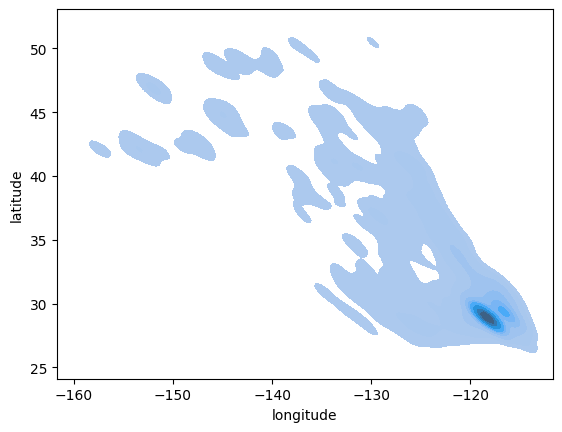

In [6]:
import seaborn as sns

# Plot kernel density estimation of the trajectories using a base map

sns.kdeplot(data = geo_df, x = geo_df['longitude'], y = geo_df['latitude'], fill=True,)